# The Sparks Foundation

# Task 2 - Supervised Machine Learning - Simple Linear Regression 

In this task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

Independent variable - Hours & Dependent variable - Percentage score

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [3]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data analysis

In [4]:
#info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
#Check for null values
data.isnull().values.any()

False

There is no null entry

In [6]:
#correlation of the dataset
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


We can see that average hour student studies for 5 hour and scores 51 And a student studies for maximum of 9 hours and scores 95.

# Exploratory Data Analysis

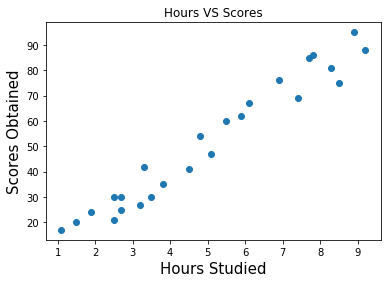

In [10]:
#Plotting how percentage scores varies with number of hours studied
plt.scatter(x=data['Hours'], y=data['Scores'])  
plt.title('Hours VS Scores')  
plt.xlabel('Hours Studied',fontsize=15)  
plt.ylabel('Scores Obtained',fontsize=15)  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

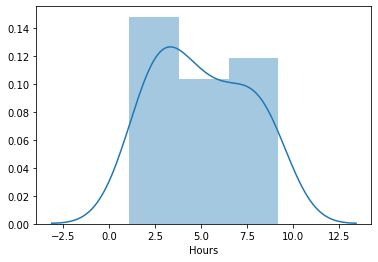

In [11]:
#Distribution of Hours feature
sns.distplot(data['Hours'])

we can see that most of the student read around 2.5 to 4.0 hours

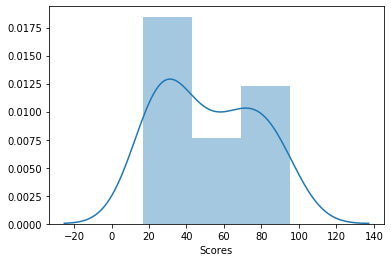

In [12]:
#Distribution of Score Feature
sns.distplot(data['Scores'])

we can see that most of the student get scores of 20 to 40% as most of them studied for less hours

# Data Preparation

In [16]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

Next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [17]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

# Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [18]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

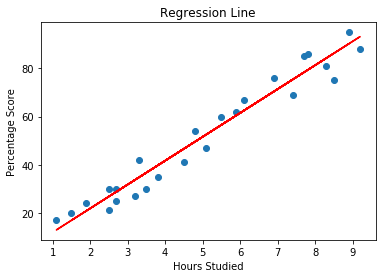

In [19]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red');
plt.title('Regression Line')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()
plt.show()

# Making Predictions


In [21]:
test_pred=regressor.predict(X_test)

# Comparing predicted values and actual values

In [22]:
df1=pd.DataFrame({'Actual':y_test,'Predicated':test_pred})
df1

,Actual,Predicated
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Text(0.5, 1.0, 'Predictions')

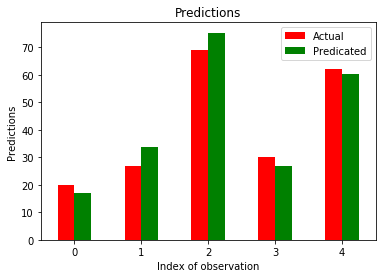

In [23]:
df1.plot.bar(rot=0,color=('red','green'))
plt.xlabel('Index of observation')
plt.ylabel('Predictions')
plt.title('Predictions')

# Prediction for 9.25 hours

In [26]:
hours = 9.25
scores = regressor.predict([[hours]])
print("Number of hours = {}".format(hours))
print("Prediction Score = {}".format(scores[0]))

Number of hours = 9.25
Prediction Score = 93.69173248737539


# Evaluation of model

In [27]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,test_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,test_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,test_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
